# Linear Regression

## Calculate Mean Absoluge Error

In [85]:
# Given
# line: y = 1.2x + 2
# points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)
# y = 1.2x + 2
x = [2.,5.,-4.,-7.,8.]
y = [-2.,6.,-4.,1.,14.]

print('x', x)
print('y', y)

# Calculate MAE for the point (x,y) above
# Calculate y hat
yhats = []
for i in range(len(x)):
    #print(x[i])
    yhat = 1.2 * x[i] + 2
    yhats.append(yhat)
    #print(yhat)
print('yhats', yhats)

# Calculate abs distances between points and a line
dists = []
for i in range(len(x)):
    dist = abs(y[i]-yhats[i])
    #print(dist)
    dists.append(dist)
print('dists', dists)
    
# Sum the distances
dist_sum = 0.0
for i in range(len(x)):
    dist_sum = dist_sum + dists[i]
    #print(dist_sum)

mae = 1/len(x) * dist_sum
print('mae', mae)

# Or better
import numpy as np

x = np.array([(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)])
y = 1.2 * x[:,0] + 2
mae = np.mean( np.abs(x[:,1] - y))
print("mean abs error is {}".format(mae))

# Sklearn
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(y, yhats)
print('mae2', mae2)

x [2.0, 5.0, -4.0, -7.0, 8.0]
y [-2.0, 6.0, -4.0, 1.0, 14.0]
yhats [4.4, 8.0, -2.8, -6.4, 11.6]
dists [6.4, 2.0, 1.2000000000000002, 7.4, 2.4000000000000004]
mae 3.88
mean abs error is 3.88
mae2 0.0


## Calculate Mean Squared Error

In [86]:
# Given
# line: y = 1.2x + 2
# points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)
# y = 1.2x + 2
x = [2.,5.,-4.,-7.,8.]
y = [-2.,6.,-4.,1.,14.]

print('x', x)
print('y', y)

# Calculate MSE for the point (x,y) above
# Calculate y hat
yhats = []
for i in range(len(x)):
    #print(x[i])
    yhat = 1.2 * x[i] + 2
    yhats.append(yhat)
    #print(yhat)
print('yhats', yhats)

# Calculate aquared distances between points and a line
import math

dists = []
for i in range(len(x)):
    dist = (y[i]-yhats[i])**2
    dists.append(dist)
print('dists', dists)
    
# Sum the distances
dist_sum = 0.0
for i in range(len(x)):
    dist_sum = dist_sum + dists[i]
    #print(dist_sum)

mse = 1/(2*len(x)) * dist_sum
print('mse', mse)

# Or better
import numpy as np

x = np.array([(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)])
y = 1.2 * x[:,0] + 2
mse = 1/2 * np.mean( (y - x[:,1])**2)
print("Mean squared error is {}".format(mse))

# Sklearn
from sklearn.metrics import mean_squared_error
# not using 1/2m but just 1/m normalizer
mse2 = mean_squared_error(y, yhats)
print('mse2', mse2)

x [2.0, 5.0, -4.0, -7.0, 8.0]
y [-2.0, 6.0, -4.0, 1.0, 14.0]
yhats [4.4, 8.0, -2.8, -6.4, 11.6]
dists [40.96000000000001, 4.0, 1.4400000000000004, 54.760000000000005, 5.760000000000002]
mse 10.692000000000002
Mean squared error is 10.692000000000002
mse2 0.0


## Mini-Batch Gradient Descent

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

# Load dataset
filename = 'data.csv'
df = pd.read_csv(filename, delimiter=',', header=None)

arr = df.values
X = arr[:,:-1]
y = arr[:,-1]

In [68]:
# Gradient descent step for linear regression, following a squared error rule.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    # matmul - Matrix product of two arrays
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new

In [69]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

In [72]:
regression_coef = miniBatchGD(X, y)
regression_coef

[array([0., 0.]),
 array([0.04944302, 0.2055208 ]),
 array([0.01046644, 0.38140999]),
 array([0.0639435 , 0.54729745]),
 array([0.09517023, 0.66037569]),
 array([0.1001119 , 0.78924256]),
 array([0.10417561, 0.88412507]),
 array([0.14879469, 0.98736463]),
 array([0.18917067, 1.09631106]),
 array([0.2154665 , 1.17460076]),
 array([0.24886439, 1.23947316]),
 array([0.27728693, 1.33916068]),
 array([0.30460547, 1.40174541]),
 array([0.3481505 , 1.45971392]),
 array([0.34040893, 1.51869478]),
 array([0.33466702, 1.57009446]),
 array([0.33994589, 1.62682816]),
 array([0.34851933, 1.63940797]),
 array([0.373485 , 1.6845238]),
 array([0.33928082, 1.72193629]),
 array([0.3593445 , 1.73171206]),
 array([0.37536229, 1.76379893]),
 array([0.3858645 , 1.80050214]),
 array([0.39143584, 1.81664656]),
 array([0.40771122, 1.828935  ]),
 array([0.42028262, 1.83767255])]

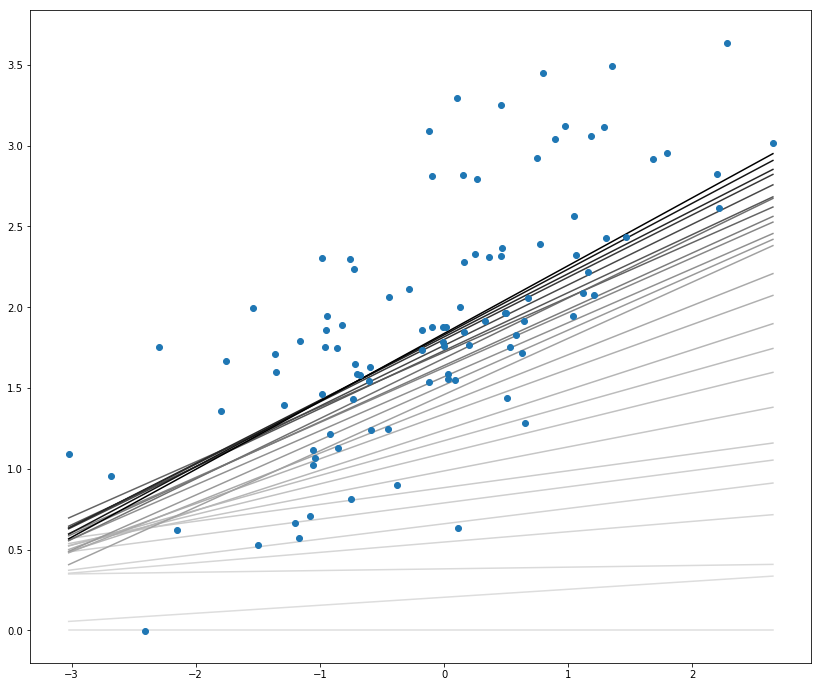

In [80]:
# plot the results
plt.figure(figsize=(14,12))
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

## Linear Regression in Sklearn

In this quiz, you'll be working with data on the average life expectancy at birth and the average BMI (Body Mass Index) for males across the world. The data comes from [Gapminder](https://www.gapminder.org/).

The data file can be found under the "bmi_and_life_expectancy.csv" tab in the quiz below. It includes three columns, containing the following data:

- Country – The country the person was born in.
- Life expectancy – The average life expectancy at birth for a person in that country.
- BMI – The mean BMI of males in that country.

In [92]:
import pandas as pd
import numpy as np

# Load dataset
filename = 'bmi_and_life_expectancy.csv'
bmi_life_data = pd.read_csv(filename, delimiter=',')
bmi_life_data.sample(5)

,Country,Life expectancy,BMI
64,Haiti,61.0,23.66302
9,Bahamas,72.2,27.24594
57,Greece,80.2,26.33786
60,Guatemala,71.2,25.29947
25,Cameroon,56.6,23.68173


In [94]:
from sklearn.linear_model import LinearRegression
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

pred_bmi = [21.07931]
laos_life_exp = bmi_life_model.predict([ pred_bmi ])
laos_life_exp

array([[60.31564716]])

## Multiple Linear Regression

In this quiz, you'll be using the [Boston house-prices dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The dataset consists of 13 features of 506 houses and the median home value in $1000's. You'll fit a model on the 13 features to predict the value of the houses.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# Predict housing price for the sample_house
prediction = model.predict(sample_house)
prediction

array([23.68284712])

## Polynomial Regression

Get some practice implementing polynomial regression in this exercise. In data.csv, you can see data generated for one predictor feature ('Var_X') and one outcome feature ('Var_Y'), following a non-linear trend. Use sklearn's PolynomialFeatures class to extend the predictor feature column into multiple columns with polynomial features. Play around with different degrees of polynomial and the Test Run button to see what fits best: when you think you have the best-fitting degree, press the Submit button to check your work!

Create the polynomial features by using the PolynomialFeatures object's .fit_transform() method. The "fit" side of the method considers how many features are needed in the output, and the "transform" side applies those considerations to the data provided to the method as an argument.

In [97]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('polynomial-data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

## Regularization

Perhaps it's not too surprising at this point, but there are classes in sklearn that will help you perform regularization with your linear regression. You'll get practice with implementing that in this exercise. In this assignment's data.csv, you'll find data for a bunch of points including six predictor variables and one outcome variable. Use sklearn's Lasso class to fit a linear regression model to the data, while also using L1 regularization to control for model complexity.

Create an instance of sklearn's Lasso class and assign it to the variable lasso_reg. You don't need to set any parameter values: use the default values for the quiz. Use the Lasso object's .fit() method to fit the regression model onto the data.

Obtain the coefficients of the fit regression model using the .coef_ attribute of the Lasso object.

In [98]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('regularization-data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]
